In [1]:
def BasicModel(x1=None, x2=None, x3=None, p1=1, p2=1):
    return {'y':((x1*x2+x3)*p1+p2),'z':((x1*x2+x3)*4*p1+p2)}

In [2]:
from ema_workbench import Model, RealParameter, ScalarOutcome, perform_experiments
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# from scipy.optimize import brentq

C:\Users\20210045\Anaconda3\lib\site-packages\ema_workbench\em_framework\evaluators.py:21: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  warnings.warn(


In [3]:
model = Model('BasicModel', function=BasicModel)

In [4]:
model.uncertainties = [RealParameter("x1", 0.1, 10),
                       RealParameter("x2", -0.01,0.01),
                       RealParameter("x3", -0.01,0.01)]

model.levers = [RealParameter("p1", 1, 5),
                RealParameter("p2", 1, 10)]

model.outcomes = [ScalarOutcome('y'),
                  ScalarOutcome('z')]

In [5]:
results = perform_experiments(model, scenarios=100, policies=100)

In [6]:
experiments, outcomes = results
print(experiments.shape)
print(list(outcomes.keys()))

(10000, 8)
['y', 'z']


In [7]:
results

(            x1        x2        x3        p1        p2 scenario policy  \
 0     5.452122  0.001360  0.007199  4.985802  2.100883        0      0   
 1     0.364618  0.005168  0.005443  4.985802  2.100883        1      0   
 2     0.669239  0.007389  0.003141  4.985802  2.100883        2      0   
 3     8.623700 -0.009764 -0.006876  4.985802  2.100883        3      0   
 4     2.416651 -0.001668 -0.002123  4.985802  2.100883        4      0   
 ...        ...       ...       ...       ...       ...      ...    ...   
 9995  9.349453 -0.004292  0.001776  2.673222  7.566733       95     99   
 9996  8.192582 -0.003641  0.003435  2.673222  7.566733       96     99   
 9997  4.003789 -0.002379 -0.002649  2.673222  7.566733       97     99   
 9998  8.981412 -0.005352  0.001330  2.673222  7.566733       98     99   
 9999  3.135361 -0.000533 -0.005414  2.673222  7.566733       99     99   
 
                model  
 0     WIES4DRUEModel  
 1     WIES4DRUEModel  
 2     WIES4DRUEModel  
 3

In [8]:
policies = experiments['policy']
for i, policy in enumerate(np.unique(policies)):
    experiments.loc[policies==policy, 'policy'] = str(i)

data = pd.DataFrame(outcomes)
data['policy'] = policies

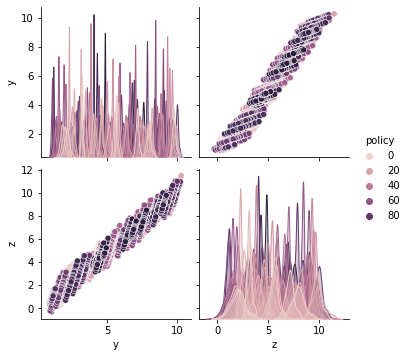

In [9]:
sns.pairplot(data, hue='policy', vars=list(outcomes.keys()))
plt.show()

In [10]:
from ema_workbench import save_results
save_results(results, '1000 scenarios 100 policies.tar.gz')

In [11]:
from ema_workbench.analysis import prim

x = experiments
y = outcomes['z'] <3
prim_alg = prim.Prim(x, y, threshold=0.8)
box1 = prim_alg.find_box()

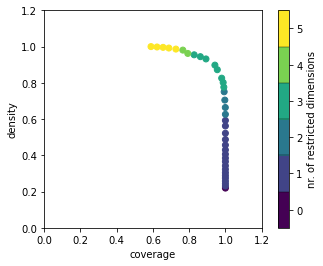

In [12]:
box1.show_tradeoff()
plt.show()

coverage    0.589416
density            1
id                36
mass          0.1292
mean               1
res_dim            5
Name: 36, dtype: object

                                                   box 36  \
                                                      min   
p2                                                  1.039   
x2                                            -0.00989364   
x1                                               0.186522   
policy  {94, 45, 64, 20, 3, 91, 36, 32, 57, 48, 50, 23...   
p1                                                1.11625   

                                                           \
                                                      max   
p2                                                2.61255   
x2                                             0.00697723   
x1                                                 8.9249   
policy  {94, 45, 64, 20, 3, 91, 36, 32, 57, 48, 50, 23...   
p1                                                 4.98

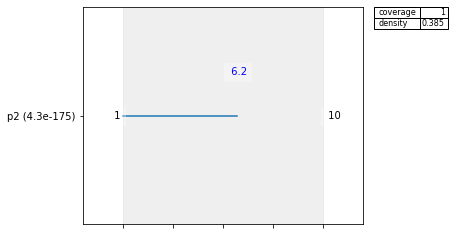

In [13]:
box1.inspect()
box1.inspect(10, style='graph')
plt.show()

C:\Users\20210045\Anaconda3\lib\site-packages\ema_workbench\analysis\scenario_discovery_util.py:404: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


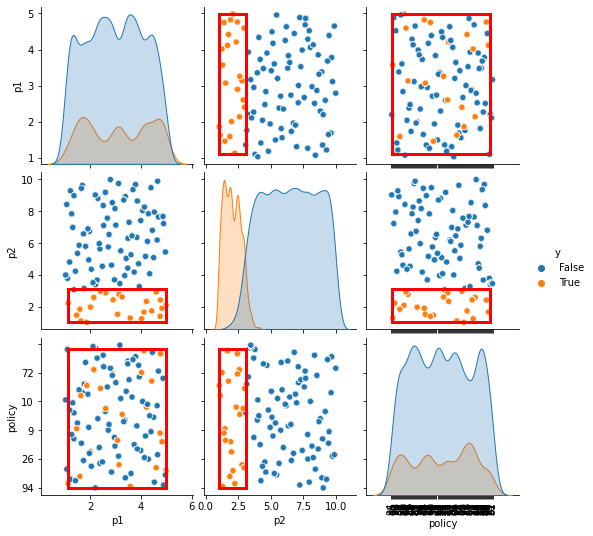

In [14]:
box1.show_pairs_scatter(25)
plt.show()

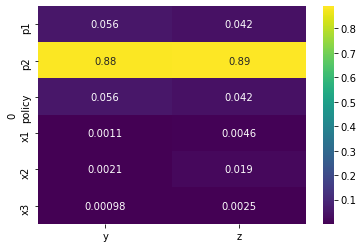

In [15]:
from ema_workbench.analysis import feature_scoring

x = experiments
y = outcomes

fs = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs, cmap='viridis', annot=True)
plt.show()